In [1]:
%matplotlib inline

# Setup logging and warnings - change ERROR to INFO for increased verbosity
import logging;
logging.basicConfig(level=logging.ERROR)

logging.getLogger().setLevel(level=logging.WARNING)
logging.getLogger('sdv').setLevel(level=logging.ERROR)

import warnings
warnings.simplefilter("ignore")

# GaussianCopula Model

In this guide we present the `GaussianCopula` model: A tool to model multivariate distributions using
[copula functions]( https://en.wikipedia.org/wiki/Copula_%28probability_theory%29), which is based
on our [Copulas Library](https://github.com/sdv-dev/Copulas).


<div class="alert alert-info">

**NOTE**

During this guide we will walk you through the specific functionalities of the `GaussianCopula`.
For a more generic view of the SDV Tabular Models and their common functionalities, please visit
the [Tabular Models](01_Tabular_Models.ipynb) guide.

</div>

## What is a Gaussian Copula?

In mathematical terms, a Gaussian Copula is a distribution over the unit cube
${\displaystyle [0,1]^{d}}$ which is constructed from a multivariate normal distribution over
${\displaystyle \mathbb {R} ^{d}}$ by using the probability integral transform.

Intuitively, a Copula is a mathematical function that allows us to describe the joint distribution of
multiple random variables by analyzing the dependencies between their marginal distributions.

For more details about Copulas, please visit the [Copulas library documentation](https://sdv.dev/Copulas/tutorials/01_Introduction_to_Copulas.html)

Let's now discover how to learn a dataset and later on generate synthetic data with the same
format and statistical properties by using the `GaussianCopula` model.

## Introducing the GaussianCopula

We will start by loading one of our demo datasets, the `student_placements`, which we used during
[Tabular Models](01_Tabular_Models.ipynb) guide.

In [27]:
from sdv.demo import load_tabular_demo

data = load_tabular_demo('student_placements')
data.head().T

,0,1,2,3,4
student_id,155368,155369,155370,155371,155372
gender,M,M,M,M,M
second_perc,67,79.33,65,56,85.8
high_perc,91,78.33,68,52,73.6
high_spec,Commerce,Science,Arts,Science,Commerce
degree_perc,58,77.48,64,52,73.3
degree_type,Sci&Tech,Sci&Tech,Comm&Mgmt,Sci&Tech,Comm&Mgmt
work_experience,False,True,False,False,False
experience_years,0,1,0,0,0
employability_perc,55,86.5,75,66,96.8


As we learned in the [Tabular Models](01_Tabular_Models.ipynb) guide, we can make the
`GaussianCopula` model learn the data by calling its `fit` methods:

In [28]:
from sdv.tabular import GaussianCopula

model = GaussianCopula(
    primary_key='student_id'
)
model.fit(data)

During these steps, the `GaussianCopula` model has performed the following operations:

1. Learn the format and data types of the passed data
2. Transform the non-numerical and null data using [Reversible Data Transforms](
   https://github.com/sdv-dev/RDT) to obtain a fully numerical representation of
   the data from which we can learn the probability distributions.
3. Learn the probability distribution of each column from the table
4. Learn the correlation between the marginal probabilities using a Gaussian Copula.

After this, we are ready to sample new data for our table using the `sample` method,
which will:

5. Sample from a Multivariate Standard Normal distribution with the learned correlations.
6. Reverse the sampled probabilities using the marginal distributions.
7. Reverse the RDT transformations to go back to the original data format.

In [29]:
new_data = model.sample(len(data))

In [30]:
new_data.head().T

,0,1,2,3,4
student_id,0,1,2,3,4
gender,F,M,F,M,F
second_perc,72.518,65.0203,54.616,84.3534,51.2264
high_perc,76.7083,65.7491,79.8384,96.3179,60.0453
high_spec,Commerce,Commerce,Science,Commerce,Science
degree_perc,75.0649,65.7111,74.5394,63.8325,63.6829
degree_type,Sci&Tech,Comm&Mgmt,Comm&Mgmt,Sci&Tech,Sci&Tech
work_experience,False,False,False,False,False
experience_years,0,1,0,-1,0
employability_perc,88.9081,50.1851,93.8224,89.7458,89.8229


## Exploring the Probability Distributions

During the pervious steps we learned that the Marginal Probability Distributions
have a very important role during the `GaussianCopula` modeling and sampling processes,
in which the `GaussianCopula` had to learn the individual distributions of each column
in our table.

We can explore the distributions which the `GaussianCopula` used to model each
column using its `get_distributions` method:

In [31]:
distributions = model.get_distributions()

This will return us a `dict` which contains the name of the distribution
class used for each column:

In [32]:
distributions

{'gender#0': 'copulas.univariate.gaussian.GaussianUnivariate',
 'gender#1': 'copulas.univariate.gaussian.GaussianUnivariate',
 'second_perc': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'high_perc': 'copulas.univariate.gaussian.GaussianUnivariate',
 'high_spec#0': 'copulas.univariate.gamma.GammaUnivariate',
 'high_spec#1': 'copulas.univariate.gaussian.GaussianUnivariate',
 'high_spec#2': 'copulas.univariate.gaussian.GaussianUnivariate',
 'degree_perc': 'copulas.univariate.student_t.StudentTUnivariate',
 'degree_type#0': 'copulas.univariate.student_t.StudentTUnivariate',
 'degree_type#1': 'copulas.univariate.gaussian.GaussianUnivariate',
 'degree_type#2': 'copulas.univariate.gaussian.GaussianUnivariate',
 'work_experience': 'copulas.univariate.student_t.StudentTUnivariate',
 'experience_years': 'copulas.univariate.gaussian.GaussianUnivariate',
 'employability_perc': 'copulas.univariate.truncated_gaussian.TruncatedGaussian',
 'mba_spec#0': 'copulas.univariate.gamma.GammaU

<div class="alert alert-info">

**NOTE**

In this list we will see multiple distributions for each one of the columns
that we have in our data. This is because the RDT transformations used
to encode the data numerically often use more than one column to represent
each one of the input variables.

</div>

Let's explore the individual distribution of one of the columns in our data to better
understand how the `GaussianCopula` processed them and see if we can improve the results
by manually specifying a different distribution.

For example, let's explore the `experience_years` column by looking at the frequency
of its values within the original data:

In [33]:
data.experience_years.value_counts()

0    141
1     62
2      9
3      2
4      1
Name: experience_years, dtype: int64

And plotting it using the `copulas.visualization` functions:

In [34]:
%matplotlib inline

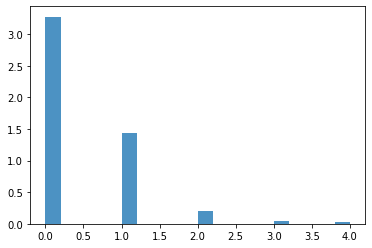

In [35]:
from copulas.visualization import hist_1d

hist_1d(data.experience_years)

By observing the data we can see that the behavior of the values in this column is very
similar to a Gamma or even some types of Beta distribution, where the majority of the
values are 0 and the frequency decreases as the values increase.

Was the `GaussianCopula` able to capture this distribution on its own?

In [36]:
distributions['experience_years']

'copulas.univariate.gaussian.GaussianUnivariate'

It seems that the it was not, as it rather thought that the behavior was closer to a
Gaussian distribution.

And, as a result, we can see how the generated values now contain negative values
which are invalid for this column:

In [37]:
new_data.experience_years.value_counts()

 0    109
 1     77
-1     18
 2     10
-2      1
Name: experience_years, dtype: int64

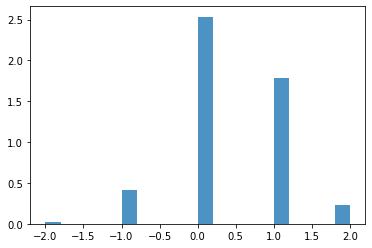

In [38]:
hist_1d(new_data.experience_years)

Let's see how we can improve this situation by passing the `GaussianCopula`
the exact distribution that we want it to use for this column.

## Customizing the Probability Distributions

The `GaussianCopula` class offers the possibility to indicate which distribution to use
for each one of the columns in the table, in order to solve situations like the one
that we just described.

In order to do this, we need to pass a `distributions` argument with `dict` that indicates,
the distribution that we want to use for each column.

Possible values for the distribution argument are:

* `univariate`: Let `copulas` select the optimal univariate distribution.
  This may result in non-parametric models being used.
* `parametric`: Let `copulas` select the optimal univariate distribution,
  but restrict the selection to parametric distributions only.
* `bounded`: Let `copulas` select the optimal univariate distribution,
  but restrict the selection to bounded distributions only.
  This may result in non-parametric models being used.
* `semi_bounded`: Let `copulas` select the optimal univariate distribution,
  but restrict the selection to semi-bounded distributions only.
  This may result in non-parametric models being used.
* `parametric_bounded`: Let `copulas` select the optimal univariate
  distribution, but restrict the selection to parametric and bounded distributions
  only.
* `parametric_semi_bounded`: Let `copulas` select the optimal univariate
  distribution, but restrict the selection to parametric and semi-bounded
  distributions only.
* `gaussian`: Use a Gaussian distribution.
* `gamma`: Use a Gamma distribution.
* `beta`: Use a Beta distribution.
* `student_t`: Use a Student T distribution.
* `gussian_kde`: Use a GaussianKDE distribution. This model is non-parametric,
  so using this will make `get_parameters` unusable.
* `truncated_gaussian`: Use a Truncated Gaussian distribution.

Let's see what happens if we make the `GaussianCopula` use the `beta` distribution
for our column.

In [44]:
from sdv.tabular import GaussianCopula

model = GaussianCopula(
    primary_key='student_id',
    distribution={
        'experience_years': 'beta'
    }
)
model.fit(data)

After this, we can see how the `GaussianCopula` used the indicated distribution
for the `experience_years` column

In [45]:
model.get_distributions()['experience_years']

'copulas.univariate.beta.BetaUnivariate'

And, as a result, now we can see how the generated data now have a behavior which is
closer to the original data and always stays within the valid values range.

In [46]:
new_data = model.sample(len(data))

In [47]:
new_data.experience_years.value_counts()

0    144
1     27
3     16
2     16
4     12
Name: experience_years, dtype: int64

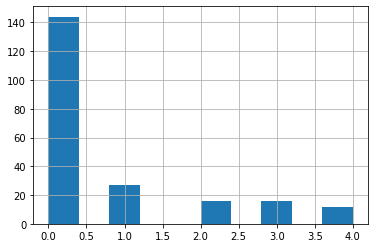

In [48]:
new_data.experience_years.hist()

<div class="alert alert-info">
    
**NOTE**
    
Even though there are situations like the one show above where manually choosing
a distribution seems to give better results, in most cases the `GaussianCopula`
will be able to find the optimal distribution on its own, making this manual
search of the marginal distributions necessary on very little occasions.

</div>